## Mini Batch Gradient Descent

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression

In [4]:
X, y = make_regression(n_samples=1000, noise=5, n_features=2, n_informative=2, random_state=42)

In [78]:
def hypothesis(X, theta):
    hy = np.zeros(X.shape[0])
    for i in range(len(theta)):
        hy+=theta[i]*X[:, i]
    return hy

def error(X, theta, y_true):
    y_pred = hypothesis(X, theta)
    
    return np.mean((y_true - y_pred)**2)

def grad(X, y, j, theta):
    # gradient of loss wrt jth theta
    y_pred = hypothesis(X, theta)
    return -2*((y - y_pred)*X[:, j]).mean()

def gradient_descent(X, y, batch_size, lr=0.001, n_epochs=1000):
    theta = np.zeros(X.shape[1])
    n_features = X.shape[1]
    
    ######
    error_list = []
    data = np.hstack([X, y.reshape(-1,1)])
    np.random.shuffle(data)
    error_list.append(error(data[:, :-1], theta, data[:, -1]))
    ######
    for i in range(n_epochs):
        gradients = np.zeros_like(theta)
        
        ###
        st = 0
        while st+batch_size <= data.shape[0]:
            
            X, y = data[st:st+batch_size, :-1], data[st:st+batch_size, -1]
            
            for j in range(n_features):
                gradients[j] = grad(X, y, j, theta)
            theta = theta - lr*gradients
            st+=batch_size
        ###
        
        error_list.append(error(data[:, :-1], theta, data[:, -1]))
    return theta, error_list

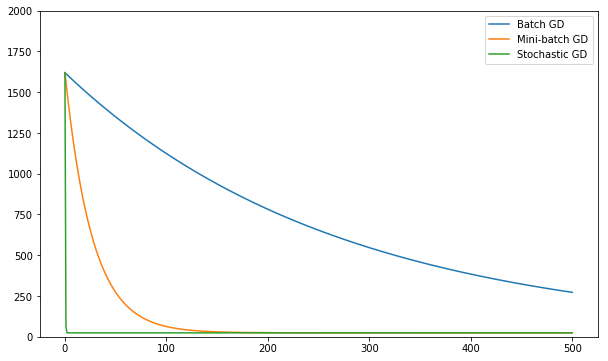

In [88]:
plt.figure(figsize=(10,6))
#batch_gradient
theta, error_list = gradient_descent(X, y, batch_size=X.shape[0], n_epochs=500)
plt.plot(error_list, label="Batch GD")
plt.ylim(0, 2000)

#mini-batch
theta, error_list = gradient_descent(X, y, batch_size=100, n_epochs=500)
plt.plot(error_list, label="Mini-batch GD")

#stochastic
theta, error_list = gradient_descent(X, y, batch_size=1, n_epochs=500)
plt.plot(error_list, label="Stochastic GD")
plt.legend()
plt.show()